In [47]:
import numpy as np
import numpy as np
import imageio.v2 as imageio
import math
import hough_transform as ht
import scipy.ndimage as ndimage
import scipy.sparse as sparse
import os
import matplotlib.pyplot as plt
import matplotlib.transforms as trans
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import cm
import cv2
col = np.array([1,2,3,5])
row = np.array([1,2,3,5])
data = np.array([1,1,1,1])

threshold 2
image [[0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]
r_max 8.485281374238571
neighborhood_size 1.0
data_min [[ 6.  1.  1.  1.  8. 10.]
 [ 6.  4.  4. 11.  9.  7.]
 [ 6.  9.  9.  6.  9.  4.]
 [12. 10. 10. 12.  5.  1.]
 [ 6.  8.  8.  6.  1.  5.]
 [ 0.  4.  4.  0.  4.  9.]]
data_max [[ 6.  1.  1.  1.  8. 10.]
 [ 6.  4.  4. 11.  9.  7.]
 [ 6.  9.  9.  6.  9.  4.]
 [12. 10. 10. 12.  5.  1.]
 [ 6.  8.  8.  6.  1.  5.]
 [ 0.  4.  4.  0.  4.  9.]]
diff [[False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]
 [False False False False False False]]
num_objects 0
x_center 3.0
y_center 3.0
x []
y []
len(x) 0
len(y) 0


IndexError: list index out of range

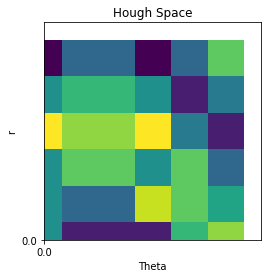

In [52]:
arraysize = 6
hough_space_size_divisor = 36
threshold = 2            #fairly good, no effect changing from 1 through 10
wafer_number = 55826023

print('threshold',threshold)
image = sparse.coo_matrix((data, (row,col)),shape=(arraysize, arraysize), dtype=float).toarray()
print('image',image)
#image = np.zeros((50,50))
#image[10:40, 10:40] = np.eye(30)
plt.imshow(image, origin='lower')

img_shape = image.shape

x_max = img_shape[0]
y_max = img_shape[1]

theta_max = 1.0 * math.pi 
theta_min = 0.0

r_min = 0.0
r_max = math.hypot(x_max, y_max)
print('r_max',r_max)

plt.close()
r_dim = arraysize 
theta_dim = arraysize

hough_space = np.zeros((r_dim,theta_dim), dtype='f')

for x in range(x_max):
    for y in range(y_max):
        if image[x,y] == 255: continue
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # print('ir',ir)
            # print('itheta',itheta)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

# plt.imshow(hough_space, origin='lower')
plt.xlim(0,theta_dim)
plt.ylim(0,r_dim)

tick_locs = [i for i in range(0,theta_dim,20)]
tick_lbls = [round( (1.0 * i * theta_max) / theta_dim,1) for i in range(0,theta_dim,20)]
plt.xticks(tick_locs, tick_lbls)

tick_locs = [i for i in range(0,r_dim,20)]
tick_lbls = [round( (1.0 * i * r_max ) / r_dim,1) for i in range(0,r_dim,20)]
plt.yticks(tick_locs, tick_lbls)

plt.xlabel(r'Theta')
plt.ylabel(r'r')
plt.title('Hough Space')

plt.imshow(hough_space, origin='lower')

neighborhood_size = hough_space.size/hough_space_size_divisor
print('neighborhood_size',neighborhood_size)
# for neighborhood_size in range(10,300):
#     print('neighborhood_size',neighborhood_size)
# # neighborhood_size = 200   fairly good

data_min = ndimage.minimum_filter(hough_space, neighborhood_size)
data_max = ndimage.maximum_filter(hough_space, neighborhood_size)
maxima = (hough_space == data_max)

print('data_min',data_min)
print('data_max',data_max)
diff = ((data_max - data_min) > threshold)
print('diff',diff)
maxima[diff == 0] = 0

# print('data_max',data_max)
# print('data_min',data_min)
# print('maxima',maxima)

#labeled - An integer ndarray where each unique feature in input has a unique label in the returned array
labeled, num_objects = ndimage.label(maxima) # non-zero values in input are features, num_objects are features found
print('num_objects',num_objects)
# print('labeled',labeled)
#slices - A list of tuples, with each tuple containing N slices (with N the dimension of the input array). 
# Slices correspond to the minimal parallelepiped that contains the object. If a number is missing, None is returned instead of a slice.
slices = ndimage.find_objects(labeled) #Array containing objects defined by different labels. Labels with value 0 are ignored

x, y = [], []
for dy,dx in slices:
    x_center = (dx.start + dx.stop - 1)/2
    x.append(x_center)
    y_center = (dy.start + dy.stop - 1)/2
    y.append(y_center)

print('x_center',x_center)
print('y_center',y_center)
print('x',x)
print('y',y)
# plt.imshow(hough_space, origin='lower')
# plt.savefig('hough_space_i_j.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.figure()
print('len(x)',len(x))
print('len(y)',len(y))
#plt.savefig('hough_space_maximas.png', bbox_inches = 'tight')
#plt.savefig("hough_space_r_theta.png",bbox_inches='tight')

plt.close()

line_index = 1

i = y[0]
j = x[0]

# # print i,j

print('i',i)
print('j',j)
print('r_max',r_max)
print('r_dim',r_dim)
print('theta_max',theta_max)
print('theta_dim',theta_dim)

r = round( (1.0 * i * r_max ) / r_dim,1)
theta = round( (1.0 * j * theta_max) / theta_dim,1)

print('r', r)
print('theta radians', theta)
print('theta degrees', np.rad2deg(theta))

fig, ax = plt.subplots()

ax.imshow(image, origin='lower')

ax.autoscale(False)

# print('y_max',y_max)

px = []
py = []
for i in range(0, np.int64(r), 1):
   print('i',i)
   px.append(math.cos(theta) * i)
   py.append(math.sin(theta) * i)

print('px',px)
print('py',py)

ax.plot(px, py, 'r+', linewidth=1)
plt.show()
plt.close()

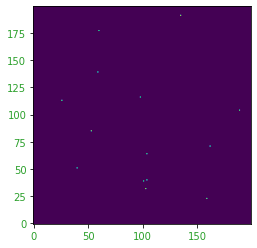

In [30]:
# col = np.array([159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234,159.545,135.152,60.743,59.938,98.786,26.489,189.773,53.153,162.449,104.686,40.93,104.752,101.122,103.234])
# row = np.array([23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965,23.71,191.485,177.04,139.96,116.29,113.995,104.44,85.795,71.035,64.39,51.1,40.06,39.685,32.965])
# data = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
image = sparse.coo_matrix((data, (row,col)),shape=(200, 200), dtype=float).toarray()
ax = plt.axes()
ax.set_facecolor('xkcd:blue')
ax.tick_params(labelcolor='tab:green')
fig = plt.figure(facecolor='white')
# fig.patch.set_facecolor('xkcd:mint green')
ax.imshow(image, origin='lower') #,cmap=plt.cm.Paired
#image = np.zeros((50,50))
#image[10:40, 10:40] = np.eye(30)
# plt.imshow(image, cmap=plt.cm.Paired, origin='lower')
# plt.show()
plt.close()

In [85]:
row = np.array([0,0,0,1,1,1,2,2,2])
col = np.array([0,1,2,0,1,2,0,1,2])
data = np.array([1,0,0,0,1,0,0,0,1])
# data = np.array([1,2,3,4,5,6,7,8,9])

r_dim = 3
theta_dim = 3

image = sparse.coo_matrix((data, (row,col)),shape=(3, 3), dtype=float).toarray()
print('image',image)
hough_space = np.zeros((r_dim,theta_dim), dtype='f')

for x in range(r_dim):
    for y in range(r_dim):
        for itheta in range(theta_dim):
            theta = 1.0 * itheta * theta_max / theta_dim
            r = x * math.cos(theta) + y * math.sin(theta)
            ir = np.ceil(r_dim * ( 1.0 * r ) / r_max).astype(int)
            # print('ir',ir)
            # print('itheta',itheta)
            hough_space[ir,itheta] = hough_space[ir,itheta] + 1

print('hough_space',hough_space)
ax = plt.axes()
ax.imshow(hough_space, origin='lower') #,cmap=plt.cm.Paired
data_max = ndimage.maximum_filter(hough_space, 2)
print('data_max',data_max)
plt.close()

image [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
hough_space [[3. 1. 4.]
 [6. 8. 5.]
 [0. 0. 0.]]
data_max [[3. 3. 4.]
 [6. 8. 8.]
 [6. 8. 8.]]


In [129]:
image_width = 3
image_height = 3
radius = 2
row = np.array([0,0,0,1,1,1,2,2,2])
col = np.array([0,1,2,0,1,2,0,1,2])
data = np.array([1,0,0,0,1,0,0,0,1])

image = sparse.coo_matrix((data, (row,col)),shape=(image_width, image_height), dtype=float).toarray()
result = np.zeros((image_width,image_height))

print('image',image)

for x in range(0,image_width-1,1):

    x0 = max(0, x - radius)
    x1 = min(image_width - 1, x + radius)

    for y in range(0,image_height-1,1):
    
        print('x',x,'y',y)
        y0 = max(0, y - radius)
        y1 = min(image_height - 1, y + radius)
        max_pixel = image[x, y]

        # print('x0',x0)
        # print('x1',x1)
        # print('y0',y0)
        # print('y1',y1)
        print('max_pixel y loop',max_pixel)

        for u in range(x0,x1,1):

            for v in range(y0,y1,1):

                print('u',u,'v',v)

                if image[u, v] > max_pixel:

                    print('max_pixel result',max_pixel)
                    max_pixel = image[u, v]

        result[x, y] = max_pixel

print('result',result)

data_max = ndimage.maximum_filter(image, 2)
print('data_max',data_max)

image [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
x 0 y 0
max_pixel y loop 1.0
u 0 v 0
u 0 v 1
u 1 v 0
u 1 v 1
x 0 y 1
max_pixel y loop 0.0
u 0 v 0
max_pixel result 0.0
u 0 v 1
u 1 v 0
u 1 v 1
x 1 y 0
max_pixel y loop 0.0
u 0 v 0
max_pixel result 0.0
u 0 v 1
u 1 v 0
u 1 v 1
x 1 y 1
max_pixel y loop 1.0
u 0 v 0
u 0 v 1
u 1 v 0
u 1 v 1
result [[1. 1. 0.]
 [1. 1. 0.]
 [0. 0. 0.]]
data_max [[1. 1. 0.]
 [1. 1. 1.]
 [0. 1. 1.]]


In [117]:
for u in range(0,2,1):

    print('u',u)

u 0
u 1
